IMPORT LIBRARIES

In [298]:
import pandas as pd

In [299]:
import matplotlib.pyplot as plt


In [300]:
!pip install contractions

In [301]:
import contractions


LOAD THE DATASET

In [302]:
data = pd.read_csv("cit.csv")

In [303]:
data

,Servicing Loan Number,CIT Origination Note,CIT Complete Note,CIT Description,CIT Origination Date,CIT Completion Date,Interaction ID Key,Call Start DT,IVR Start DT,IVR End DT,ACD Start DT,ACD End DT,Call End DT
0,4.700078e+07,NEW CIT582-SEND E-DOC Please email bwr a copy ...,DONE 02/19/21 BY TLR 07931 TSK TYP 582-SEND E-DOC,SEND E-DOC,02/17/2021,02/19/2021,100143675720210217,02/17/2021 12:00:01.000,02/17/2021 12:00:03.000,02/17/2021 12:02:19.000,NaN,NaN,02/17/2021 12:02:20.000
1,4.700114e+07,NEW CIT582-SEND E-DOC Bwer is requesting the E...,DONE 04/22/21 BY TLR 05991 TSK TYP 582-SEND E-DOC,SEND E-DOC,04/19/2021,04/22/2021,100125683240210312,03/12/2021 08:37:39.000,03/12/2021 08:37:40.000,03/12/2021 08:39:08.000,03/12/2021 08:39:49.000,03/12/2021 08:44:59.000,03/12/2021 08:44:59.000
2,4.700124e+07,NEW CIT582-SEND E-DOC please email copy of the...,DONE 01/07/21 BY TLR 08788 TSK TYP 582-SEND E-DOC,SEND E-DOC,01/05/2021,01/07/2021,100142063520210217,02/17/2021 10:31:24.000,02/17/2021 10:31:26.000,02/17/2021 10:32:27.000,02/17/2021 10:33:15.000,02/17/2021 10:44:32.000,02/17/2021 10:44:32.000
3,4.700160e+07,NEW CIT582-SEND E-DOC Customer is requesting t...,DONE 10/01/21 BY TLR 01167 TSK TYP 582-SEND E-DOC,SEND E-DOC,09/29/2021,10/01/2021,100165382630210513,05/13/2021 18:06:05.000,05/13/2021 18:06:07.000,05/13/2021 18:07:44.000,05/13/2021 18:08:27.000,05/13/2021 18:37:57.000,05/13/2021 18:37:57.000
4,4.700286e+07,NEW CIT568-C&R - ESCROW RESEARCH REQUEST Pls m...,DONE 03/11/21 BY TLR 03864 TSK TYP 582-SEND E-DOC,SEND E-DOC,03/09/2021,03/11/2021,100132633920210413,04/13/2021 11:19:55.000,04/13/2021 11:19:57.000,04/13/2021 11:21:56.000,04/13/2021 11:22:37.000,04/13/2021 11:27:08.000,04/13/2021 11:27:08.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163709,1.891889e+09,NEW CIT582-SEND E-DOC please email payoff on f...,DONE 02/17/21 BY TLR 01270 TSK TYP 582-SEND E-DOC,SEND E-DOC,02/12/2021,02/17/2021,,NaN,NaN,NaN,NaN,NaN,NaN
163710,1.891889e+09,NEW CIT582-SEND E-DOC cust ci to would like if...,DONE 02/17/21 BY TLR 01270 TSK TYP 582-SEND E-DOC,SEND E-DOC,02/12/2021,02/17/2021,200136322930211123,11/23/2021 18:33:13.000,11/23/2021 18:33:15.000,11/23/2021 18:36:08.000,11/23/2021 18:36:51.000,11/23/2021 18:38:23.000,11/23/2021 18:38:23.000
163711,1.892106e+09,NEW CIT582-SEND E-DOC Borrower is requesting p...,DONE 07/23/21 BY TLR 04057 TSK TYP 582-SEND E-DOC,SEND E-DOC,07/22/2021,07/23/2021,100161116340210826,08/26/2021 14:59:11.000,08/26/2021 14:59:12.000,08/26/2021 15:01:24.000,08/26/2021 15:02:04.000,08/26/2021 15:09:09.000,08/26/2021 15:09:09.000
163712,2.602311e+09,NEW CIT582-SEND E-DOC Please resend the YE sta...,DONE 05/03/21 BY TLR 05991 TSK TYP 582-SEND E-DOC,SEND E-DOC,04/27/2021,05/03/2021,200147903130210329,03/29/2021 16:20:13.000,03/29/2021 16:20:15.000,03/29/2021 16:21:33.000,NaN,NaN,03/29/2021 16:21:33.000


In [304]:
data_one_column = data[['CIT Origination Note']]

In [305]:
data_one_column

,CIT Origination Note
0,NEW CIT582-SEND E-DOC Please email bwr a copy ...
1,NEW CIT582-SEND E-DOC Bwer is requesting the E...
2,NEW CIT582-SEND E-DOC please email copy of the...
3,NEW CIT582-SEND E-DOC Customer is requesting t...
4,NEW CIT568-C&R - ESCROW RESEARCH REQUEST Pls m...
...,...
163709,NEW CIT582-SEND E-DOC please email payoff on f...
163710,NEW CIT582-SEND E-DOC cust ci to would like if...
163711,NEW CIT582-SEND E-DOC Borrower is requesting p...
163712,NEW CIT582-SEND E-DOC Please resend the YE sta...


In [306]:
df1 = data.dropna()
df1.head()

,Servicing Loan Number,CIT Origination Note,CIT Complete Note,CIT Description,CIT Origination Date,CIT Completion Date,Interaction ID Key,Call Start DT,IVR Start DT,IVR End DT,ACD Start DT,ACD End DT,Call End DT
1,47001136.0,NEW CIT582-SEND E-DOC Bwer is requesting the E...,DONE 04/22/21 BY TLR 05991 TSK TYP 582-SEND E-DOC,SEND E-DOC,04/19/2021,04/22/2021,100125683240210312,03/12/2021 08:37:39.000,03/12/2021 08:37:40.000,03/12/2021 08:39:08.000,03/12/2021 08:39:49.000,03/12/2021 08:44:59.000,03/12/2021 08:44:59.000
2,47001243.0,NEW CIT582-SEND E-DOC please email copy of the...,DONE 01/07/21 BY TLR 08788 TSK TYP 582-SEND E-DOC,SEND E-DOC,01/05/2021,01/07/2021,100142063520210217,02/17/2021 10:31:24.000,02/17/2021 10:31:26.000,02/17/2021 10:32:27.000,02/17/2021 10:33:15.000,02/17/2021 10:44:32.000,02/17/2021 10:44:32.000
3,47001599.0,NEW CIT582-SEND E-DOC Customer is requesting t...,DONE 10/01/21 BY TLR 01167 TSK TYP 582-SEND E-DOC,SEND E-DOC,09/29/2021,10/01/2021,100165382630210513,05/13/2021 18:06:05.000,05/13/2021 18:06:07.000,05/13/2021 18:07:44.000,05/13/2021 18:08:27.000,05/13/2021 18:37:57.000,05/13/2021 18:37:57.000
4,47002860.0,NEW CIT568-C&R - ESCROW RESEARCH REQUEST Pls m...,DONE 03/11/21 BY TLR 03864 TSK TYP 582-SEND E-DOC,SEND E-DOC,03/09/2021,03/11/2021,100132633920210413,04/13/2021 11:19:55.000,04/13/2021 11:19:57.000,04/13/2021 11:21:56.000,04/13/2021 11:22:37.000,04/13/2021 11:27:08.000,04/13/2021 11:27:08.000
5,47002860.0,NEW CIT568-C&R - ESCROW RESEARCH REQUEST Pls m...,DONE 04/28/17 BY TLR 07685 TSK TYP 568-C&R - E...,SEND E-DOC,03/09/2021,03/11/2021,100132633920210413,04/13/2021 11:19:55.000,04/13/2021 11:19:57.000,04/13/2021 11:21:56.000,04/13/2021 11:22:37.000,04/13/2021 11:27:08.000,04/13/2021 11:27:08.000


In [307]:
df1['CIT Origination Date'] =  pd.to_datetime(df1['CIT Origination Date'])
df1['CIT Completion Date'] =  pd.to_datetime(df1['CIT Completion Date'])

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108051 entries, 1 to 163711
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Servicing Loan Number  108051 non-null  float64       
 1   CIT Origination Note   108051 non-null  object        
 2   CIT Complete Note      108051 non-null  object        
 3   CIT Description        108051 non-null  object        
 4   CIT Origination Date   108051 non-null  datetime64[ns]
 5   CIT Completion Date    108051 non-null  datetime64[ns]
 6   Interaction ID Key     108051 non-null  object        
 7   Call Start DT          108051 non-null  object        
 8   IVR Start DT           108051 non-null  object        
 9   IVR End DT             108051 non-null  object        
 10  ACD Start DT           108051 non-null  object        
 11  ACD End DT             108051 non-null  object        
 12  Call End DT            108051 non-null  obje

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [308]:
difference = (df1['CIT Completion Date']-df1['CIT Origination Date'])

In [309]:
difference_new = pd.DataFrame(difference)

In [310]:
difference_new

,0
1,3 days
2,2 days
3,2 days
4,2 days
5,2 days
...,...
163699,8 days
163702,8 days
163708,11 days
163710,5 days


In [311]:
difference_new.columns = ["Days Difference"]

In [312]:
difference_new

,Days Difference
1,3 days
2,2 days
3,2 days
4,2 days
5,2 days
...,...
163699,8 days
163702,8 days
163708,11 days
163710,5 days


In [313]:
difference_new['Days Difference'] = difference_new['Days Difference'].astype("string")

(array([6.7136e+04, 2.9833e+04, 1.0783e+04, 1.0600e+02, 1.3500e+02,
        2.5000e+01, 1.7000e+01, 4.0000e+00, 6.0000e+00, 6.0000e+00]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

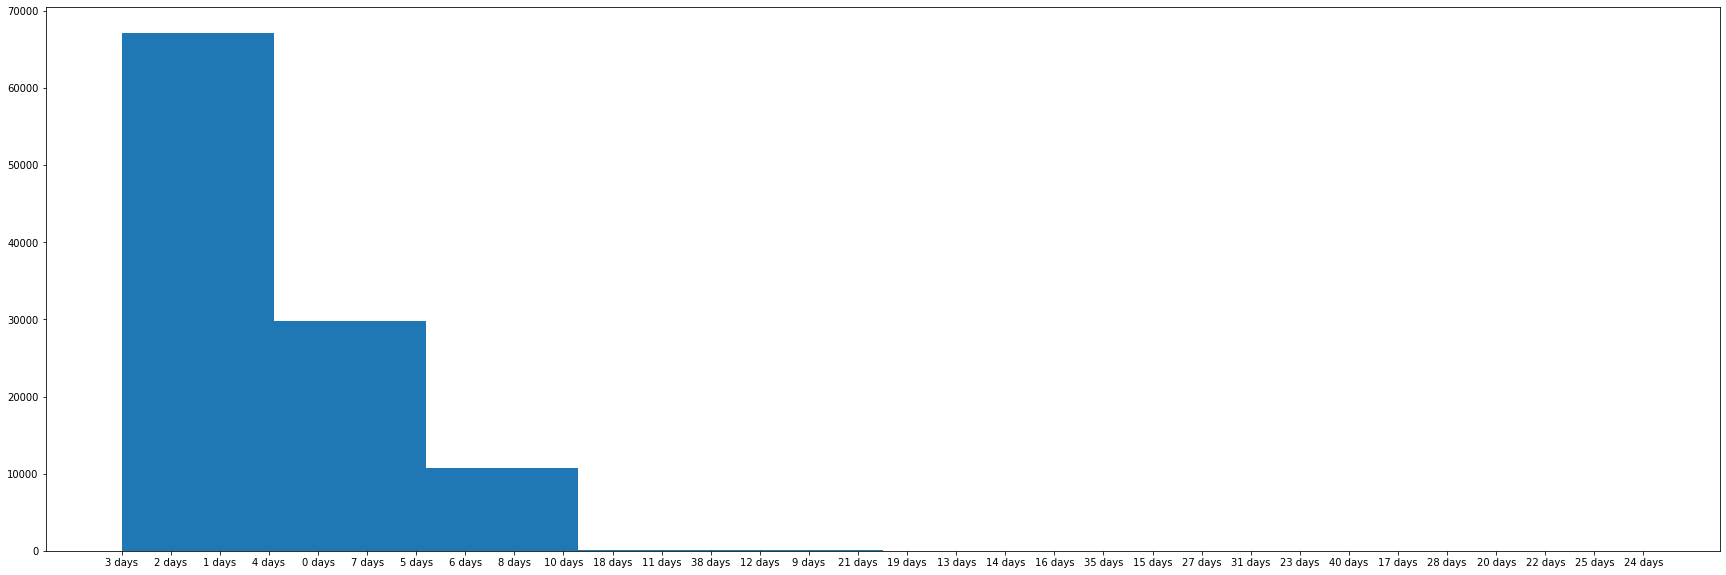

In [314]:
plt.figure(figsize=(30,10))
plt.hist(difference_new['Days Difference'])

DATA PRE-PROCESSING

In [315]:
df = data.copy()

In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163714 entries, 0 to 163713
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Servicing Loan Number  163713 non-null  float64
 1   CIT Origination Note   163691 non-null  object 
 2   CIT Complete Note      161371 non-null  object 
 3   CIT Description        163713 non-null  object 
 4   CIT Origination Date   163713 non-null  object 
 5   CIT Completion Date    161333 non-null  object 
 6   Interaction ID Key     163713 non-null  object 
 7   Call Start DT          148375 non-null  object 
 8   IVR Start DT           148375 non-null  object 
 9   IVR End DT             148375 non-null  object 
 10  ACD Start DT           109797 non-null  object 
 11  ACD End DT             109714 non-null  object 
 12  Call End DT            148375 non-null  object 
dtypes: float64(1), object(12)
memory usage: 16.2+ MB


Separating CIT 582 and CIT 591, In the first step separating CIT 591

In [317]:
df_591 = df[df['CIT Origination Note'].str[8].isin(['9'])]

In [318]:
df_591_CON = df_591[['CIT Origination Note']]

In [319]:
df_591_CON

,CIT Origination Note
9,NEW CIT591-REQUEST LOAN DOCUMENTS 12 mnth pay ...
13,NEW CIT591-REQUEST LOAN DOCUMENTS A new messag...
14,NEW CIT591-REQUEST LOAN DOCUMENTS A new messag...
20,NEW CIT591-REQUEST LOAN DOCUMENTS Please send ...
21,NEW CIT591-REQUEST LOAN DOCUMENTS Please send ...
...,...
163699,NEW CIT591-REQUEST LOAN DOCUMENTS Please send ...
163701,NEW CIT591-REQUEST LOAN DOCUMENTS please send ...
163706,NEW CIT591-REQUEST LOAN DOCUMENTS Customer is ...
163707,NEW CIT591-REQUEST LOAN DOCUMENTS Please mail ...


In [320]:
df_591_CON.dtypes

CIT Origination Note    object
dtype: object

In [321]:
#df_591_CON = df_591_CON.astype({"CIT Origination Note": object})

In [322]:
df_591_CON['CIT Origination Note'] = df_591_CON['CIT Origination Note'].str.replace('NEW', '')
df_591_CON['CIT Origination Note'] = df_591_CON['CIT Origination Note'].str.replace('CIT591-REQUEST', '')
df_591_CON['CIT Origination Note'] = df_591_CON['CIT Origination Note'].str.replace('Please', '')
df_591_CON['CIT Origination Note'] = df_591_CON['CIT Origination Note'].str.replace('please', '')
df_591_CON['CIT Origination Note'] = df_591_CON['CIT Origination Note'].str.replace('LOAN', '')
df_591_CON['CIT Origination Note'] = df_591_CON['CIT Origination Note'].str.replace('DOCUMENTS', '')
df_591_CON['CIT Origination Note'] = df_591_CON['CIT Origination Note'].str.replace('new', '')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [323]:
df_591_CON

,CIT Origination Note
9,12 mnth pay hist
13,A message has been created with Reference...
14,A message has been created with Reference...
20,send another copy of the april billing st...
21,send another copy of the april billing st...
...,...
163699,send br recast info via mail
163701,send a third party authorization form to ...
163706,Customer is requesting that we send a copy...
163707,mail ACH draft set up form 11/12/21 to ad...


Removing Punctuation

In [324]:
df_591_CON["CIT Origination Note"] = df_591_CON["CIT Origination Note"].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [325]:
df_591_CON

,CIT Origination Note
9,12 mnth pay hist
13,A message has been created with Reference...
14,A message has been created with Reference...
20,send another copy of the april billing st...
21,send another copy of the april billing st...
...,...
163699,send br recast info via mail
163701,send a third party authorization form to ...
163706,Customer is requesting that we send a copy...
163707,mail ACH draft set up form 111221 to addr...


Removing Null Values

In [326]:
df_591_CON = df_591_CON[df_591_CON['CIT Origination Note'].notna()]

In [327]:
df_591_CON

,CIT Origination Note
9,12 mnth pay hist
13,A message has been created with Reference...
14,A message has been created with Reference...
20,send another copy of the april billing st...
21,send another copy of the april billing st...
...,...
163699,send br recast info via mail
163701,send a third party authorization form to ...
163706,Customer is requesting that we send a copy...
163707,mail ACH draft set up form 111221 to addr...


In [328]:
df_591_CON.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43606 entries, 9 to 163708
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CIT Origination Note  43606 non-null  object
dtypes: object(1)
memory usage: 681.3+ KB


LOWERING THE SENTENCES

In [329]:
df_591_CON["CIT Origination Note"] = df_591_CON["CIT Origination Note"].str.lower()


Removing Stop Words

In [330]:
from nltk.corpus import stopwords


In [331]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [332]:
stop = stopwords.words('english')

In [333]:
df_591_CON["CIT Origination Note"] = df_591_CON["CIT Origination Note"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [334]:
df_591_CON

,CIT Origination Note
9,12 mnth pay hist
13,message created reference id sn7tnecpkcaiqimmkt1
14,message created reference id sn7tnecpkcaiqimmkt1
20,send another copy april billing statement show...
21,send another copy april billing statement show...
...,...
163699,send br recast info via mail
163701,send third party authorization form jeffrey co...
163706,customer requesting send copy fm welcome lette...
163707,mail ach draft set form 111221 address file


COUNTING WORDS FREQUENCY COUNT CIT 591

In [335]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [336]:
top_N = 20
a = df_591_CON['CIT Origination Note'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

         Word  Frequency
0     address      11991
1        send      10406
2        mail      10165
3        copy       9029
4     message       8921
5          id       8515
6   reference       8504
7     created       8497
8     mailing       7830
9        file       7174
10  statement       6315
11       edms       5588
12       docs       5291
13    request       4323
14   customer       4295
15    history       4008
16    payment       3955
17   uploaded       3503
18     letter       3390
19       loss       3271


Expand Contractions

In [337]:
df_591_CON['CIT Origination Note'] = df_591_CON['CIT Origination Note'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [338]:
df_591_CON

,CIT Origination Note
9,"[12, mnth, pay, hist]"
13,"[message, created, reference, id, sn7tnecpkcai..."
14,"[message, created, reference, id, sn7tnecpkcai..."
20,"[send, another, copy, april, billing, statemen..."
21,"[send, another, copy, april, billing, statemen..."
...,...
163699,"[send, br, recast, info, via, mail]"
163701,"[send, third, party, authorization, form, jeff..."
163706,"[customer, requesting, send, copy, fm, welcome..."
163707,"[mail, ach, draft, set, form, 111221, address,..."


In [339]:
df_591_CON[['CIT Origination Note']]

,CIT Origination Note
9,"[12, mnth, pay, hist]"
13,"[message, created, reference, id, sn7tnecpkcai..."
14,"[message, created, reference, id, sn7tnecpkcai..."
20,"[send, another, copy, april, billing, statemen..."
21,"[send, another, copy, april, billing, statemen..."
...,...
163699,"[send, br, recast, info, via, mail]"
163701,"[send, third, party, authorization, form, jeff..."
163706,"[customer, requesting, send, copy, fm, welcome..."
163707,"[mail, ach, draft, set, form, 111221, address,..."


BAR GRAPH WITH MOST USED WORDS CIT 591

In [340]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency Count')

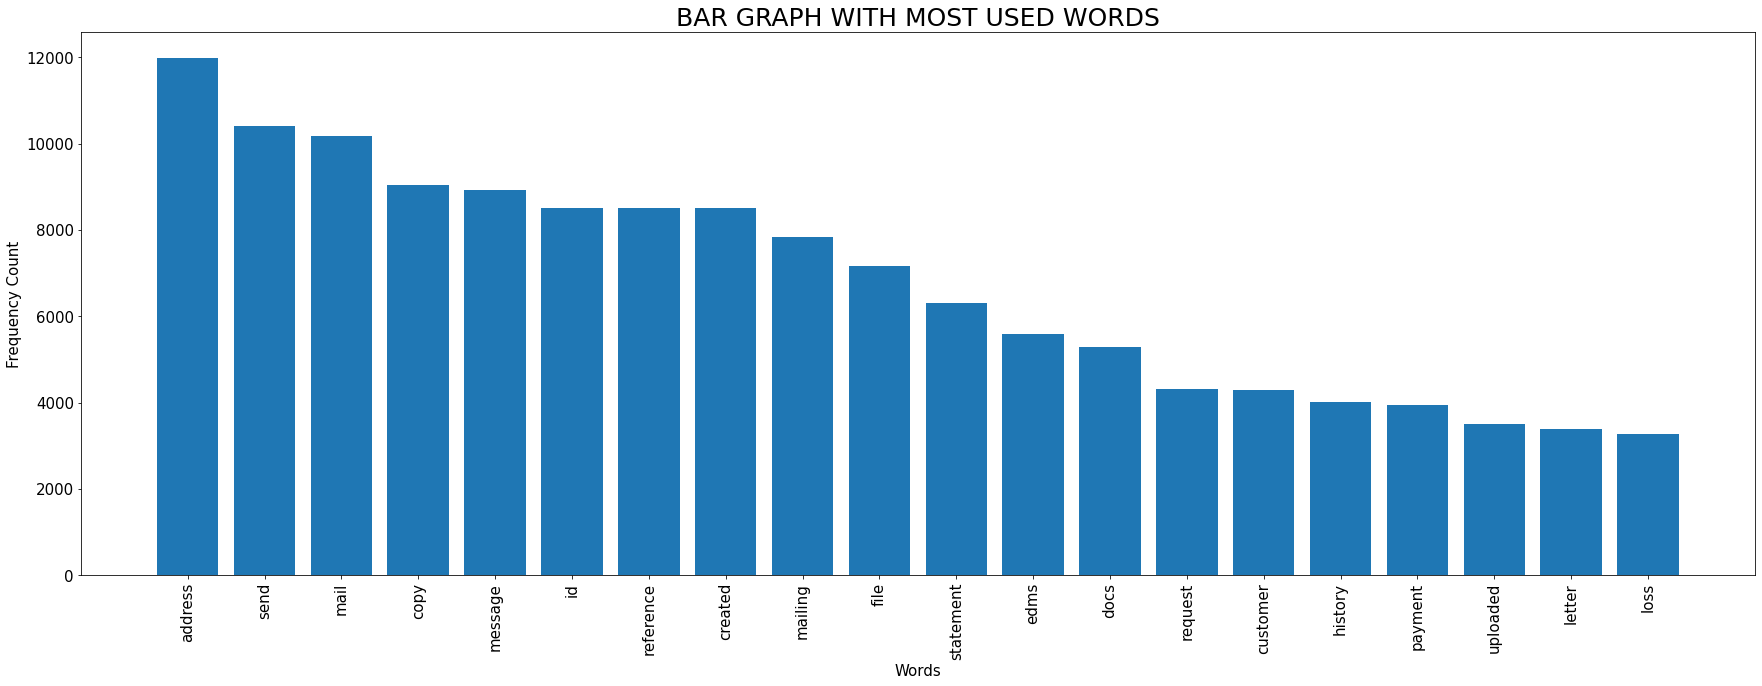

In [341]:
plt.figure(figsize=(30,10))
plt.bar(rslt['Word'], rslt['Frequency'])
plt.title("BAR GRAPH WITH MOST USED WORDS", fontsize = 25)
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.xlabel("Words", fontsize = 15)
plt.ylabel("Frequency Count", fontsize = 15)

In [342]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [343]:
df_591_CON['CIT Origination Note']

9                                     [12, mnth, pay, hist]
13        [message, created, reference, id, sn7tnecpkcai...
14        [message, created, reference, id, sn7tnecpkcai...
20        [send, another, copy, april, billing, statemen...
21        [send, another, copy, april, billing, statemen...
                                ...                        
163699                  [send, br, recast, info, via, mail]
163701    [send, third, party, authorization, form, jeff...
163706    [customer, requesting, send, copy, fm, welcome...
163707    [mail, ach, draft, set, form, 111221, address,...
163708    [b1, requesting, original, note, note, 11521, ...
Name: CIT Origination Note, Length: 43606, dtype: object

In [344]:
df_591_CON[['CIT Origination Note']]

,CIT Origination Note
9,"[12, mnth, pay, hist]"
13,"[message, created, reference, id, sn7tnecpkcai..."
14,"[message, created, reference, id, sn7tnecpkcai..."
20,"[send, another, copy, april, billing, statemen..."
21,"[send, another, copy, april, billing, statemen..."
...,...
163699,"[send, br, recast, info, via, mail]"
163701,"[send, third, party, authorization, form, jeff..."
163706,"[customer, requesting, send, copy, fm, welcome..."
163707,"[mail, ach, draft, set, form, 111221, address,..."


Create a word cloud separate for   CIT591

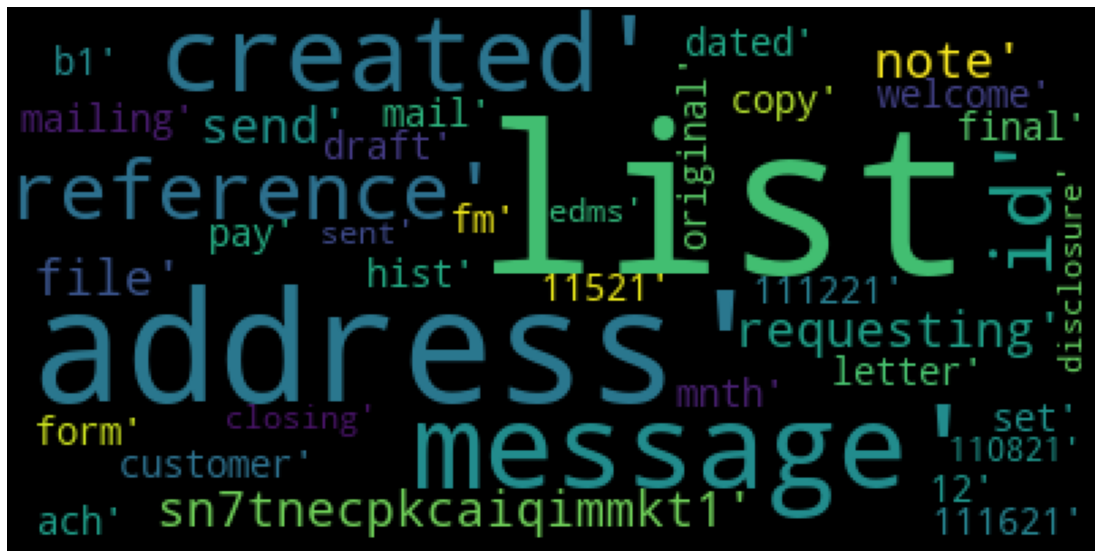

In [345]:
plt.figure(figsize=(30,10))

text = df_591_CON['CIT Origination Note'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [346]:
df1 = data.dropna()
df1.head()

,Servicing Loan Number,CIT Origination Note,CIT Complete Note,CIT Description,CIT Origination Date,CIT Completion Date,Interaction ID Key,Call Start DT,IVR Start DT,IVR End DT,ACD Start DT,ACD End DT,Call End DT
1,47001136.0,NEW CIT582-SEND E-DOC Bwer is requesting the E...,DONE 04/22/21 BY TLR 05991 TSK TYP 582-SEND E-DOC,SEND E-DOC,04/19/2021,04/22/2021,100125683240210312,03/12/2021 08:37:39.000,03/12/2021 08:37:40.000,03/12/2021 08:39:08.000,03/12/2021 08:39:49.000,03/12/2021 08:44:59.000,03/12/2021 08:44:59.000
2,47001243.0,NEW CIT582-SEND E-DOC please email copy of the...,DONE 01/07/21 BY TLR 08788 TSK TYP 582-SEND E-DOC,SEND E-DOC,01/05/2021,01/07/2021,100142063520210217,02/17/2021 10:31:24.000,02/17/2021 10:31:26.000,02/17/2021 10:32:27.000,02/17/2021 10:33:15.000,02/17/2021 10:44:32.000,02/17/2021 10:44:32.000
3,47001599.0,NEW CIT582-SEND E-DOC Customer is requesting t...,DONE 10/01/21 BY TLR 01167 TSK TYP 582-SEND E-DOC,SEND E-DOC,09/29/2021,10/01/2021,100165382630210513,05/13/2021 18:06:05.000,05/13/2021 18:06:07.000,05/13/2021 18:07:44.000,05/13/2021 18:08:27.000,05/13/2021 18:37:57.000,05/13/2021 18:37:57.000
4,47002860.0,NEW CIT568-C&R - ESCROW RESEARCH REQUEST Pls m...,DONE 03/11/21 BY TLR 03864 TSK TYP 582-SEND E-DOC,SEND E-DOC,03/09/2021,03/11/2021,100132633920210413,04/13/2021 11:19:55.000,04/13/2021 11:19:57.000,04/13/2021 11:21:56.000,04/13/2021 11:22:37.000,04/13/2021 11:27:08.000,04/13/2021 11:27:08.000
5,47002860.0,NEW CIT568-C&R - ESCROW RESEARCH REQUEST Pls m...,DONE 04/28/17 BY TLR 07685 TSK TYP 568-C&R - E...,SEND E-DOC,03/09/2021,03/11/2021,100132633920210413,04/13/2021 11:19:55.000,04/13/2021 11:19:57.000,04/13/2021 11:21:56.000,04/13/2021 11:22:37.000,04/13/2021 11:27:08.000,04/13/2021 11:27:08.000


In [347]:
df1[['CIT Description']]

,CIT Description
1,SEND E-DOC
2,SEND E-DOC
3,SEND E-DOC
4,SEND E-DOC
5,SEND E-DOC
...,...
163699,REQUEST LOAN DOCUMENTS
163702,SEND E-DOC
163708,REQUEST LOAN DOCUMENTS
163710,SEND E-DOC


Bar plot of CIT Description

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text major ticklabel objects>)

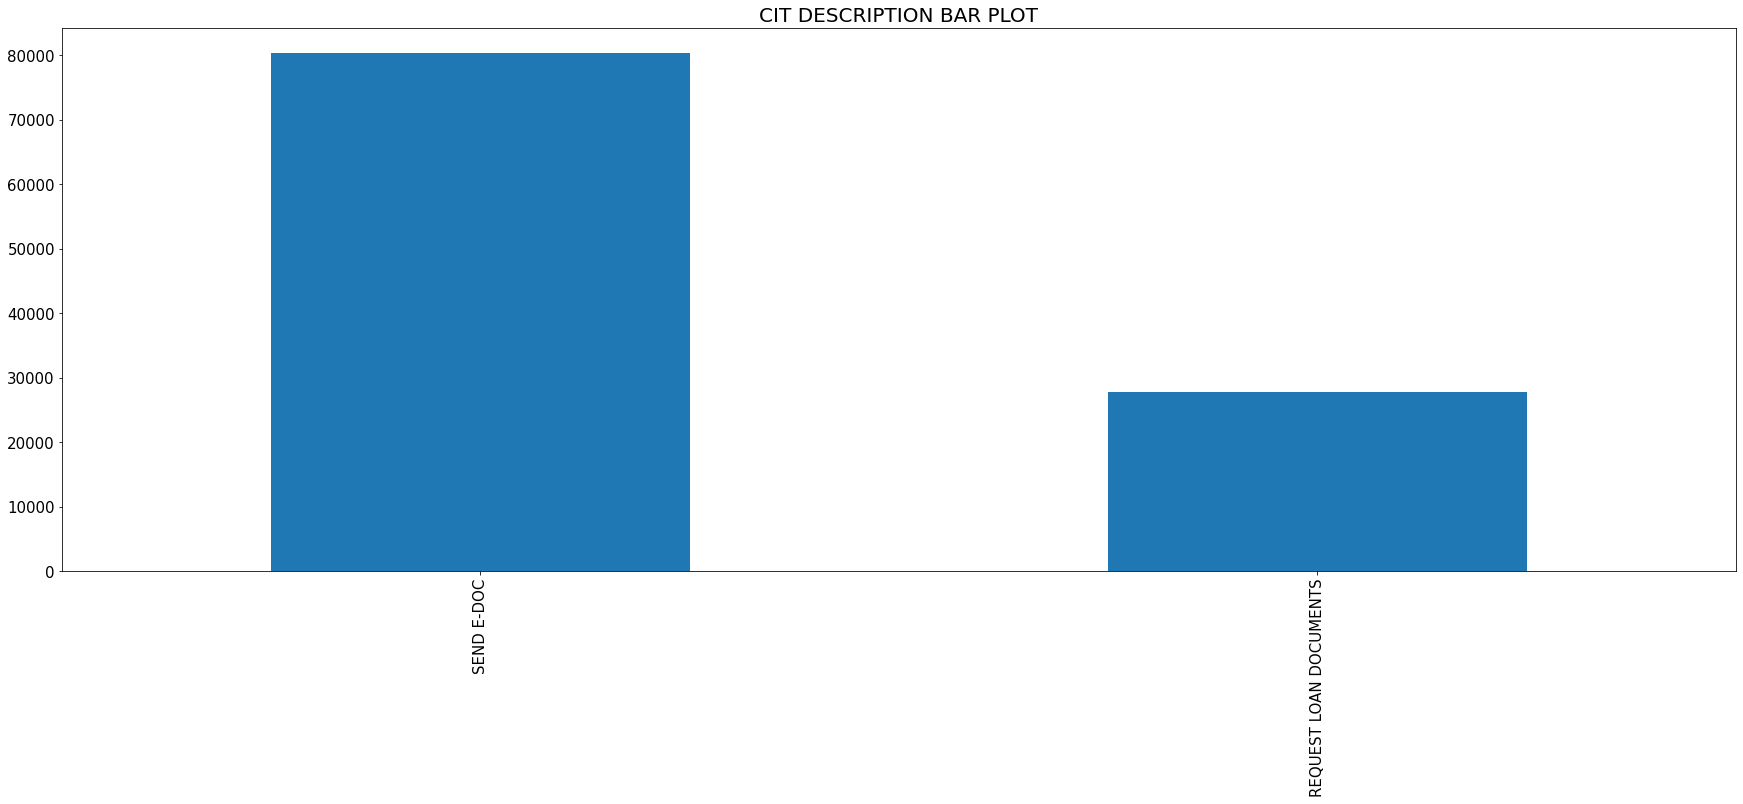

In [348]:
plt.figure(figsize=(30,10))
df1['CIT Description'].value_counts().plot(kind='bar')
plt.title("CIT DESCRIPTION BAR PLOT", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

Separating CIT 582

In [349]:
df_582 = df[df['CIT Origination Note'].str[8].isin(['8'])]

In [350]:
df_582_CON = df_582[['CIT Origination Note']]

In [351]:
df_582_CON

,CIT Origination Note
0,NEW CIT582-SEND E-DOC Please email bwr a copy ...
1,NEW CIT582-SEND E-DOC Bwer is requesting the E...
2,NEW CIT582-SEND E-DOC please email copy of the...
3,NEW CIT582-SEND E-DOC Customer is requesting t...
6,NEW CIT582-SEND E-DOC BWR is requesting a copy...
...,...
163705,NEW CIT582-SEND E-DOC Customer just switched l...
163709,NEW CIT582-SEND E-DOC please email payoff on f...
163710,NEW CIT582-SEND E-DOC cust ci to would like if...
163711,NEW CIT582-SEND E-DOC Borrower is requesting p...


In [352]:
df_582_CON['CIT Origination Note'] = df_582_CON['CIT Origination Note'].str.replace('NEW', '')
df_582_CON['CIT Origination Note'] = df_582_CON['CIT Origination Note'].str.replace('CIT582-SEND', '')
df_582_CON['CIT Origination Note'] = df_582_CON['CIT Origination Note'].str.replace('Please', '')
df_582_CON['CIT Origination Note'] = df_582_CON['CIT Origination Note'].str.replace('please', '')
df_582_CON['CIT Origination Note'] = df_582_CON['CIT Origination Note'].str.replace('LOAN', '')
df_582_CON['CIT Origination Note'] = df_582_CON['CIT Origination Note'].str.replace('DOCUMENTS', '')
df_582_CON['CIT Origination Note'] = df_582_CON['CIT Origination Note'].str.replace('new', '')
df_582_CON['CIT Origination Note'] = df_582_CON['CIT Origination Note'].str.replace('E-DOC', '')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Removing Punctuation

In [353]:
df_582_CON["CIT Origination Note"] = df_582_CON["CIT Origination Note"].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [354]:
df_582_CON[["CIT Origination Note"]]

,CIT Origination Note
0,email bwr a copy of the 2017 1098 YE state...
1,Bwer is requesting the Escrow Ann statement...
2,email copy of the escrow analysis dated 12...
3,Customer is requesting that we send the cop...
6,BWR is requesting a copy of the appraisal l...
...,...
163705,Customer just switched loan over to us she ...
163709,email payoff on file to wrinconamerisavecom
163710,cust ci to would like if we could email her...
163711,Borrower is requesting payment history for ...


Removing Null Values

In [355]:
df_582_CON = df_582_CON[df_582_CON['CIT Origination Note'].notna()]

In [356]:
df_582_CON

,CIT Origination Note
0,email bwr a copy of the 2017 1098 YE state...
1,Bwer is requesting the Escrow Ann statement...
2,email copy of the escrow analysis dated 12...
3,Customer is requesting that we send the cop...
6,BWR is requesting a copy of the appraisal l...
...,...
163705,Customer just switched loan over to us she ...
163709,email payoff on file to wrinconamerisavecom
163710,cust ci to would like if we could email her...
163711,Borrower is requesting payment history for ...


In [357]:
df_591_CON.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43606 entries, 9 to 163708
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CIT Origination Note  43606 non-null  object
dtypes: object(1)
memory usage: 681.3+ KB


Lowering the Sentences

In [358]:
df_582_CON["CIT Origination Note"] = df_582_CON["CIT Origination Note"].str.lower()


Removing Stop Words

In [359]:
stop = stopwords.words('english')

In [360]:
df_582_CON["CIT Origination Note"] = df_582_CON["CIT Origination Note"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [361]:
df_582_CON

,CIT Origination Note
0,email bwr copy 2017 1098 ye statement dated 21...
1,bwer requesting escrow ann statement emailed c...
2,email copy escrow analysis dated 12920 edms bo...
3,customer requesting send copy payoff statement...
6,bwr requesting copy appraisal located edms sen...
...,...
163705,customer switched loan us needs billing statem...
163709,email payoff file wrinconamerisavecom
163710,cust ci would like could email th borrowers fi...
163711,borrower requesting payment history 201720182019


BAR GRAPH WITH MOST USED WORDS OVERALL

In [362]:
data = pd.read_csv("cit.csv")

In [363]:
datas = data.dropna()

In [364]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(15, 15), dpi=80)

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [365]:
datas['CIT Origination Note'] = datas['CIT Origination Note'].str.replace('NEW', '')
datas['CIT Origination Note'] = datas['CIT Origination Note'].str.replace('CIT582-SEND', '')
datas['CIT Origination Note'] = datas['CIT Origination Note'].str.replace('Please', '')
datas['CIT Origination Note'] = datas['CIT Origination Note'].str.replace('please', '')
datas['CIT Origination Note'] = datas['CIT Origination Note'].str.replace('LOAN', '')
datas['CIT Origination Note'] = datas['CIT Origination Note'].str.replace('DOCUMENTS', '')
datas['CIT Origination Note'] = datas['CIT Origination Note'].str.replace('new', '')
datas['CIT Origination Note'] = datas['CIT Origination Note'].str.replace('E-DOC', '')
datas['CIT Origination Note'] = datas['CIT Origination Note'].str.replace('CIT591-REQUEST', '')
datas['CIT Origination Note'] = datas['CIT Origination Note'].str.replace('request', '')
datas['CIT Origination Note'] = datas['CIT Origination Note'].str.replace('document', '')






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [366]:
datas["CIT Origination Note"] = datas["CIT Origination Note"].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [367]:
stop = stopwords.words('english')

In [368]:
datas["CIT Origination Note"] = datas["CIT Origination Note"].str.lower()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [369]:
datas["CIT Origination Note"] = datas["CIT Origination Note"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [370]:
top_N = 20
a = datas['CIT Origination Note'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

         Word  Frequency
0       email      59489
1        send      36434
2        copy      34277
3     address      17625
4   statement      17068
5        edms      16478
6    customer      14599
7      letter      13735
8        file      12750
9       dated      10882
10        ing      10581
11       sent      10444
12    payment      10221
13        bwr       9340
14    history       9268
15       cust       8720
16       1098       8342
17       mail       8286
18       note       7368
19    emailed       7345


Text(0, 0.5, 'Frequency Count')

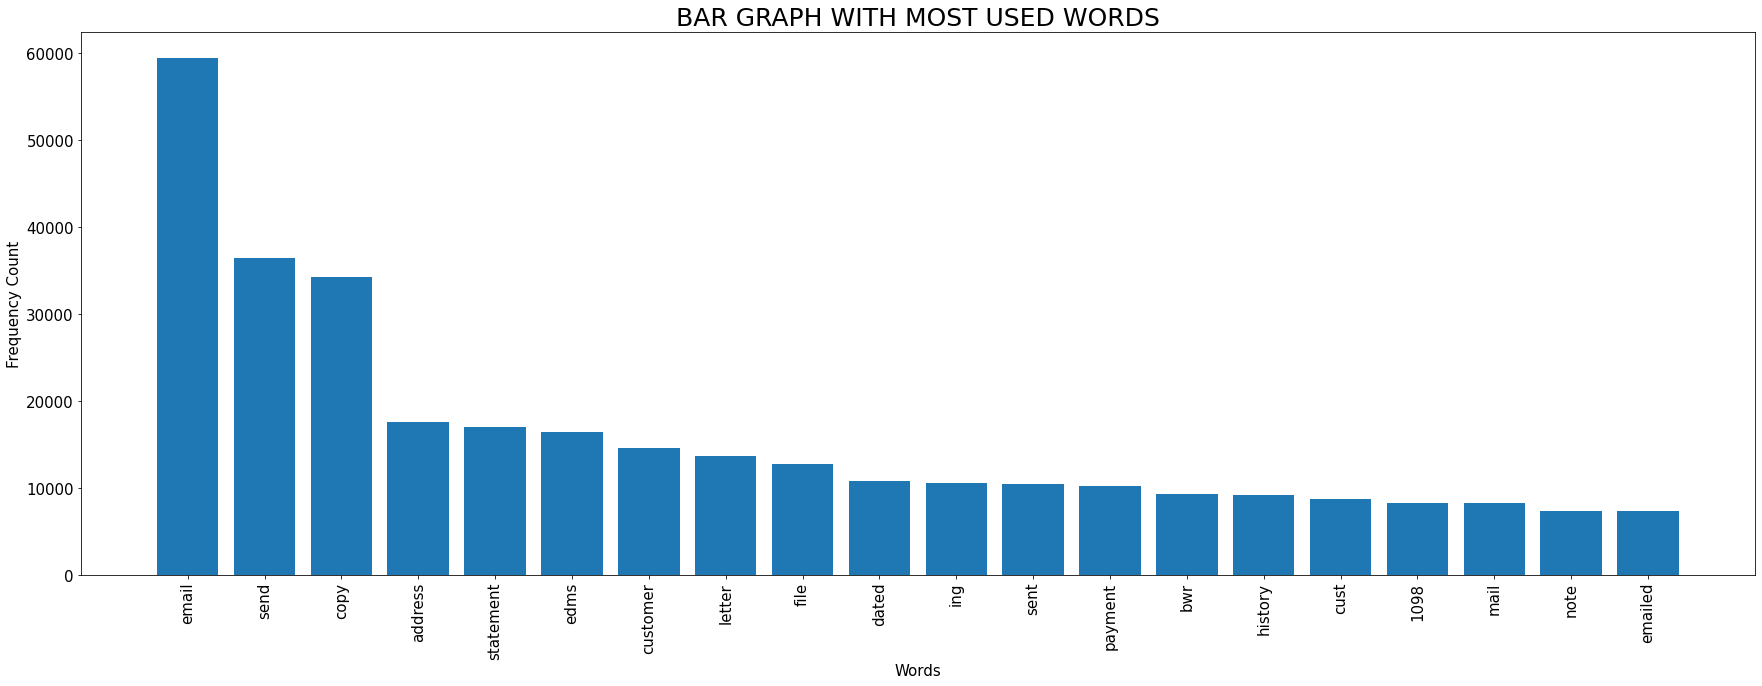

In [371]:
plt.figure(figsize=(30,10))
plt.bar(rslt['Word'], rslt['Frequency'])
plt.title("BAR GRAPH WITH MOST USED WORDS", fontsize = 25)
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.xlabel("Words", fontsize = 15)
plt.ylabel("Frequency Count", fontsize = 15)

Words Frequency Count for CIT 582

In [372]:
top_N = 20
a = df_582_CON['CIT Origination Note'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

          Word  Frequency
0        email      87044
1         send      44407
2         copy      42145
3    statement      20661
4         edms      18008
5     customer      17091
6       letter      15099
7   requesting      14400
8         1098      14152
9      address      14127
10       dated      13494
11        sent      12655
12        file      11958
13         bwr      11861
14     payment      11093
15     emailed      10856
16     history       9933
17     request       9332
18        cust       9276
19        2020       9088


Expand Contractions

In [373]:
df_582_CON['CIT Origination Note'] = df_582_CON['CIT Origination Note'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [374]:
df_582_CON

,CIT Origination Note
0,"[email, bwr, copy, 2017, 1098, ye, statement, ..."
1,"[bwer, requesting, escrow, ann, statement, ema..."
2,"[email, copy, escrow, analysis, dated, 12920, ..."
3,"[customer, requesting, send, copy, payoff, sta..."
6,"[bwr, requesting, copy, appraisal, located, ed..."
...,...
163705,"[customer, switched, loan, us, needs, billing,..."
163709,"[email, payoff, file, wrinconamerisavecom]"
163710,"[cust, ci, would, like, could, email, th, borr..."
163711,"[borrower, requesting, payment, history, 20172..."


In [375]:
import matplotlib.pyplot as plt

In [376]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

BAR GRAPH WITH MOST USED WORDS CIT 582

Text(0, 0.5, 'Frequency Count')

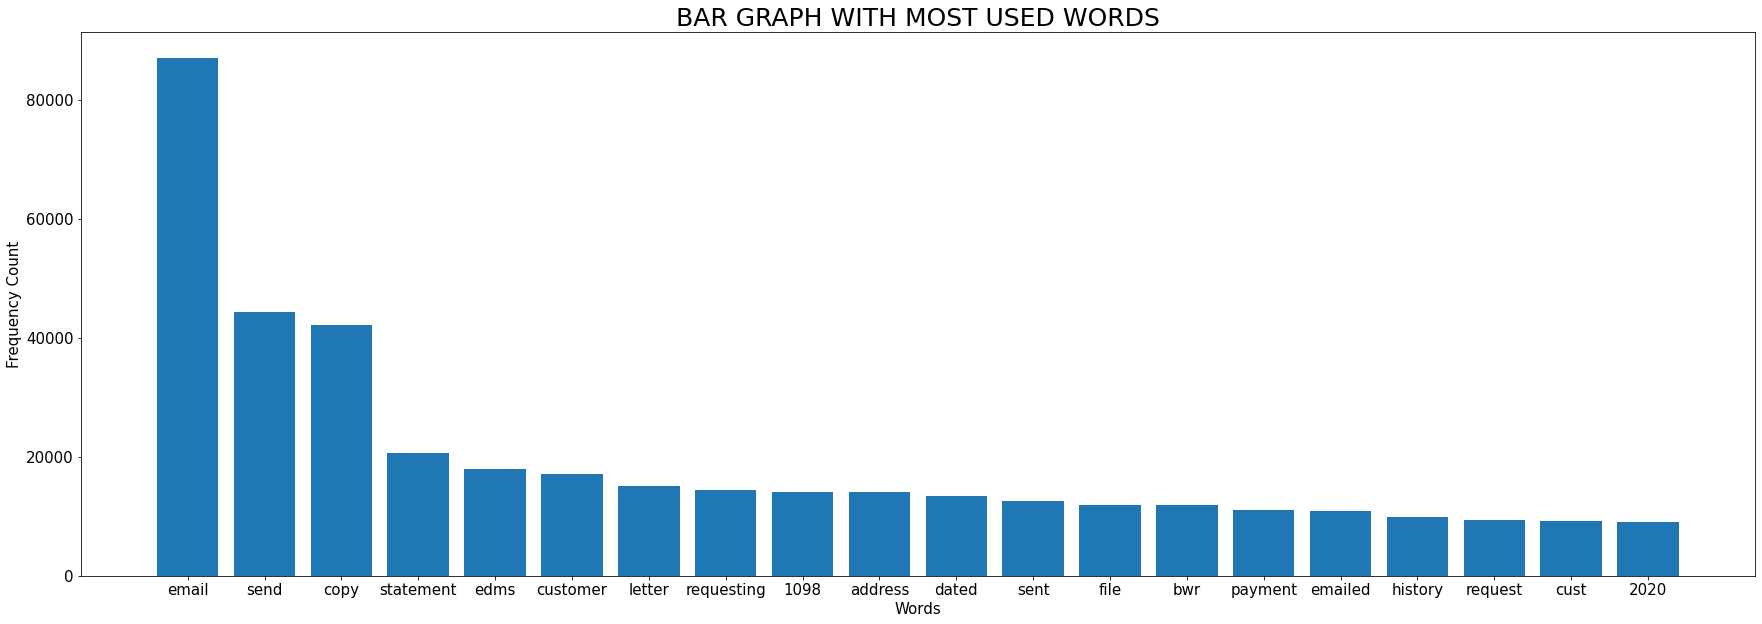

In [377]:
plt.figure(figsize=(30,10))
plt.bar(rslt['Word'], rslt['Frequency'])
plt.title("BAR GRAPH WITH MOST USED WORDS", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Words", fontsize = 15)
plt.ylabel("Frequency Count", fontsize = 15)

In [378]:
df1 = data.dropna()
df1.head()

,Servicing Loan Number,CIT Origination Note,CIT Complete Note,CIT Description,CIT Origination Date,CIT Completion Date,Interaction ID Key,Call Start DT,IVR Start DT,IVR End DT,ACD Start DT,ACD End DT,Call End DT
1,47001136.0,NEW CIT582-SEND E-DOC Bwer is requesting the E...,DONE 04/22/21 BY TLR 05991 TSK TYP 582-SEND E-DOC,SEND E-DOC,04/19/2021,04/22/2021,100125683240210312,03/12/2021 08:37:39.000,03/12/2021 08:37:40.000,03/12/2021 08:39:08.000,03/12/2021 08:39:49.000,03/12/2021 08:44:59.000,03/12/2021 08:44:59.000
2,47001243.0,NEW CIT582-SEND E-DOC please email copy of the...,DONE 01/07/21 BY TLR 08788 TSK TYP 582-SEND E-DOC,SEND E-DOC,01/05/2021,01/07/2021,100142063520210217,02/17/2021 10:31:24.000,02/17/2021 10:31:26.000,02/17/2021 10:32:27.000,02/17/2021 10:33:15.000,02/17/2021 10:44:32.000,02/17/2021 10:44:32.000
3,47001599.0,NEW CIT582-SEND E-DOC Customer is requesting t...,DONE 10/01/21 BY TLR 01167 TSK TYP 582-SEND E-DOC,SEND E-DOC,09/29/2021,10/01/2021,100165382630210513,05/13/2021 18:06:05.000,05/13/2021 18:06:07.000,05/13/2021 18:07:44.000,05/13/2021 18:08:27.000,05/13/2021 18:37:57.000,05/13/2021 18:37:57.000
4,47002860.0,NEW CIT568-C&R - ESCROW RESEARCH REQUEST Pls m...,DONE 03/11/21 BY TLR 03864 TSK TYP 582-SEND E-DOC,SEND E-DOC,03/09/2021,03/11/2021,100132633920210413,04/13/2021 11:19:55.000,04/13/2021 11:19:57.000,04/13/2021 11:21:56.000,04/13/2021 11:22:37.000,04/13/2021 11:27:08.000,04/13/2021 11:27:08.000
5,47002860.0,NEW CIT568-C&R - ESCROW RESEARCH REQUEST Pls m...,DONE 04/28/17 BY TLR 07685 TSK TYP 568-C&R - E...,SEND E-DOC,03/09/2021,03/11/2021,100132633920210413,04/13/2021 11:19:55.000,04/13/2021 11:19:57.000,04/13/2021 11:21:56.000,04/13/2021 11:22:37.000,04/13/2021 11:27:08.000,04/13/2021 11:27:08.000


In [379]:
df1[['CIT Description']]

,CIT Description
1,SEND E-DOC
2,SEND E-DOC
3,SEND E-DOC
4,SEND E-DOC
5,SEND E-DOC
...,...
163699,REQUEST LOAN DOCUMENTS
163702,SEND E-DOC
163708,REQUEST LOAN DOCUMENTS
163710,SEND E-DOC


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text major ticklabel objects>)

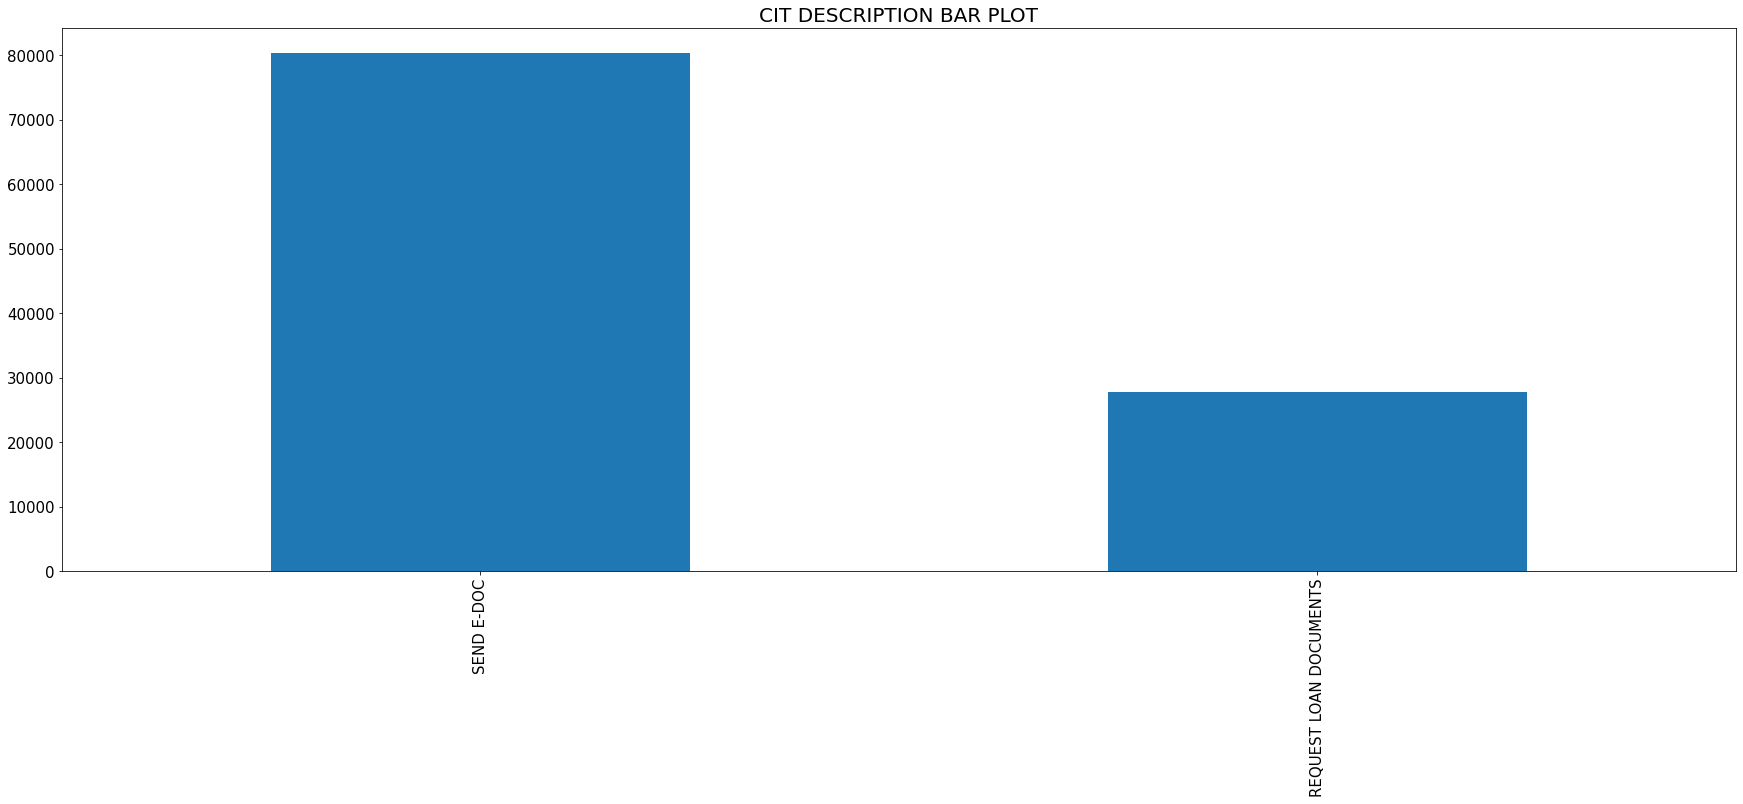

In [380]:
plt.figure(figsize=(30,10))
df1['CIT Description'].value_counts().plot(kind='bar')
plt.title("CIT DESCRIPTION BAR PLOT", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

Create a word cloud separate for  CIT 582 

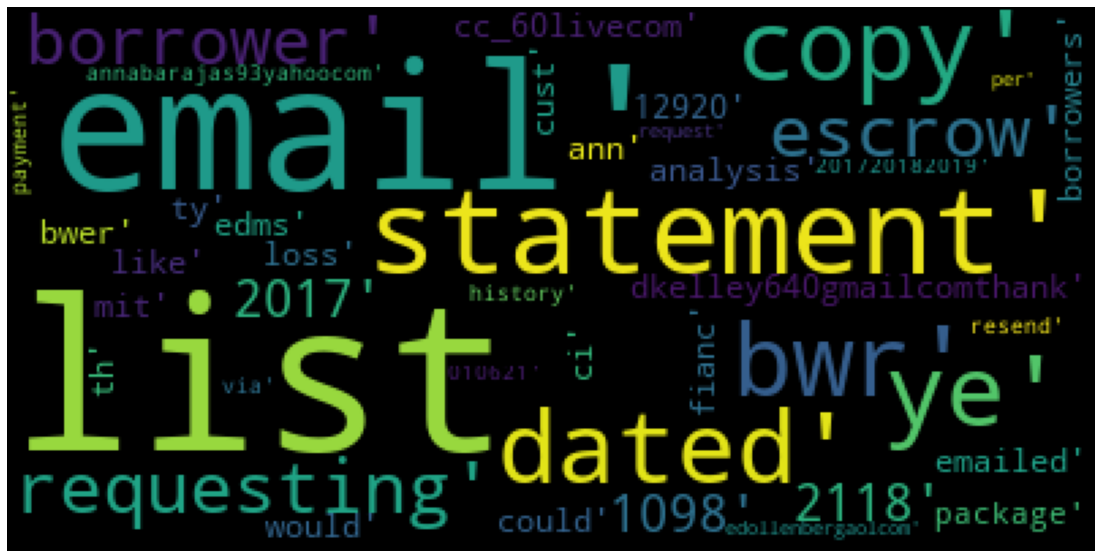

In [381]:
plt.figure(figsize=(30,10))

text = df_582_CON['CIT Origination Note'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
